In [3]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv("train.csv")
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


In [6]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.corr()['carat']

id      -0.000771
carat    1.000000
depth    0.027852
table    0.225737
x        0.980563
y        0.980161
z        0.974274
price    0.943396
Name: carat, dtype: float64

<AxesSubplot:>

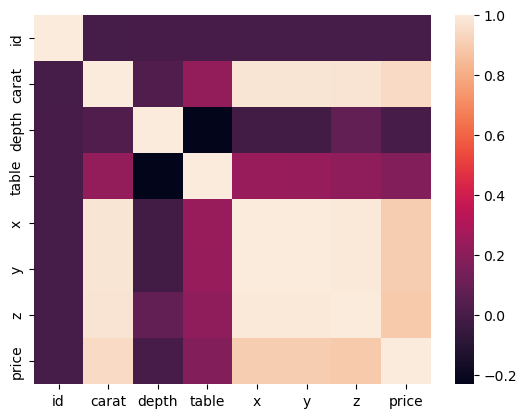

In [9]:
cor = df.corr()
sns.heatmap(cor)

In [10]:
df['price'] = 48393 - df['id']
df.drop('id',axis = 1 , inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,48393
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,48392
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,48391
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,48390
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,48389


In [11]:
df.drop('carat',axis = 1 , inplace = True)
df.head()

,cut,color,clarity,depth,table,x,y,z,price
0,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,48393
1,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,48392
2,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,48391
3,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,48390
4,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,48389


In [27]:
df.data = pd.get_dummies(data =df,drop_first=True)

df.data.head()

,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,62.2,58.0,7.27,7.33,4.55,48393,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,62.0,58.0,8.06,8.12,5.05,48392,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,61.2,57.0,5.69,5.73,3.50,48391,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,61.6,56.0,4.38,4.41,2.71,48390,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,62.6,59.0,7.65,7.61,4.77,48389,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
X = df.data.drop('cut_Good',axis = 1)
X.head()

,depth,table,x,y,z,price,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,62.2,58.0,7.27,7.33,4.55,48393,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,62.0,58.0,8.06,8.12,5.05,48392,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,61.2,57.0,5.69,5.73,3.50,48391,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,61.6,56.0,4.38,4.41,2.71,48390,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,62.6,59.0,7.65,7.61,4.77,48389,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
Y = df.data[['cut_Good']]
Y.head()

,cut_Good
0,0
1,0
2,0
3,0
4,0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

X train:  (154858, 22)
X test:  (38715, 22)
Y train:  (154858, 1)
Y test:  (38715, 1)


In [34]:
lm = linear_model.LinearRegression()

lm.fit(X_train,Y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lm.predict(X_test)

#Mean Absolute Error
print("Mean Absolute Error : ",mean_absolute_error(Y_test, y_pred))

#Mean Squared Error
print("Mean Squared Error : ",mean_squared_error(Y_test, y_pred))

#R2 score
print("R2 Score : ",r2_score(Y_test, y_pred))

#Score
print("Score : ",lm.score(X_test,Y_test))


Mean Absolute Error :  0.02922085803229355
Mean Squared Error :  0.008849834016580812
R2 Score :  0.8475691200966016
Score :  0.8475691200966016


<AxesSubplot:xlabel='cut_Good'>

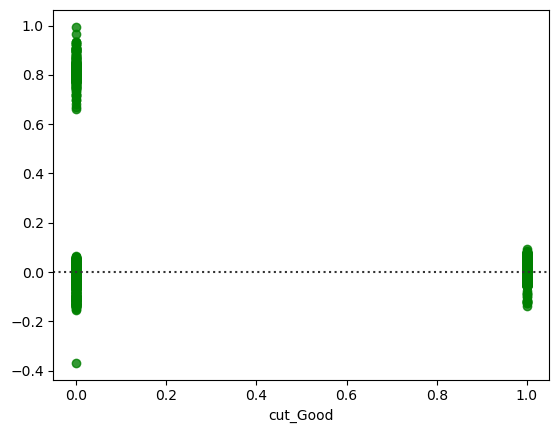

In [36]:
sns.residplot(x=Y_test,y=y_pred, color="g")

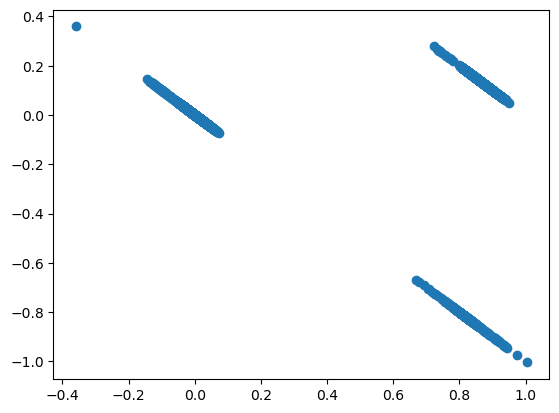

In [37]:
residuals = Y_test - y_pred

plt.scatter(y_pred, residuals)
plt.show()

In [38]:
lm.coef_

array([[-1.33898563e-02, -4.51152994e-03, -2.02826413e-01,
         2.09839138e-01, -1.23289004e-02,  5.52675010e-09,
        -8.83677470e-01, -8.69786076e-01, -8.73437591e-01,
         1.12919031e-03, -1.98663774e-03,  1.45385355e-04,
         4.81333070e-04,  2.24513191e-03,  1.40566258e-03,
         8.95912994e-02,  9.72364009e-02,  9.17438629e-02,
         9.44077299e-02,  9.41499323e-02,  9.27397225e-02,
         9.16211354e-02]])

In [39]:
lm.intercept_

array([1.87029778])

In [41]:
import pickle
filename = 'finalized_model_2.sav'
pickle.dump(lm, open(filename, 'wb'))

In [42]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8475691200966016
